# Overview

We will attempt to create a filter that can distinguish between edible and poisonous mushrooms based on some easily observable characteristics. We discuss briefly in the summary how the model could be adjusted to benefit both individuals or further adjusted for use on an industrial scale.

This dataset is a cleaned version of the original Mushroom Dataset for Binary Classification Available at UCI Library. This dataset was cleaned using various techniques such as Modal imputation, one-hot encoding, z-score normalization, and feature selection. It contains 9 columns:

- Cap Diameter
- Cap Shape
- Gill Attachment
- Gill Color
- Stem Height
- Stem Width
- Stem Color
- Season
- Class - Is it edible or not?

#### Our variable of interest, the Class variable is either 0 or 1 - where 0 refers to edible and 1 refers to poisonous.

In [1]:
import pandas as pd

mush_data = "mushroom_cleaned.csv"

mush_df = pd.read_csv(mush_data)

In [2]:
mush_df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [3]:
mush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [4]:
from sklearn.model_selection import train_test_split

# to create a new series composed of our targets
labels = mush_df['class']

# to drop our target column and resave without the target column
features = mush_df.drop('class', axis = 1)

# create a training and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels,  test_size=0.2, random_state=42)

attributes = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season'
]

In [5]:
X_train.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,43228.000000,43228.000000,43228.000000,43228.000000,43228.000000,43228.000000,43228.000000,43228.000000
mean,567.675442,3.994795,2.138267,7.324859,0.759497,1052.557116,8.420561,0.951277
std,360.584357,2.162429,2.228573,3.201606,0.652320,783.231965,3.261763,0.304490
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450
50%,526.000000,5.000000,1.000000,7.000000,0.593295,925.000000,11.000000,0.943195
75%,782.000000,6.000000,4.000000,10.000000,1.054858,1527.000000,11.000000,0.943195
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273


In [6]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

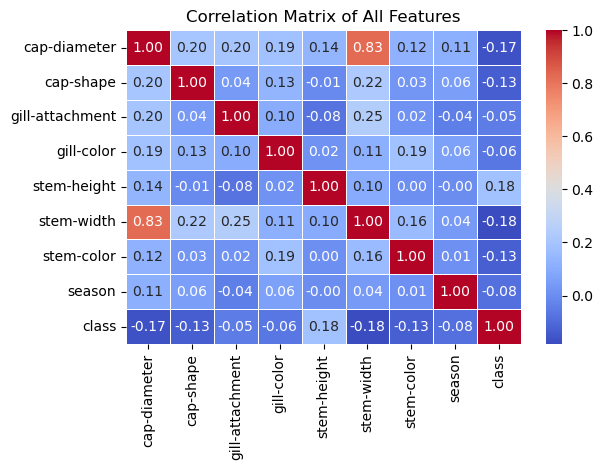

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix =  mush_df.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of All Features')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The correlation matrix indicates that no single variable is a good predictor of the class.

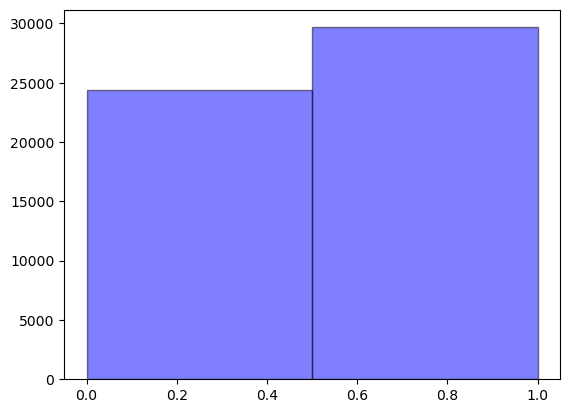

In [8]:
mush_df['class'].hist(bins=2, color='blue', edgecolor='black', alpha=0.5, grid=False)
plt.show()

Showing a histogram for class shows that the mushrooms are slightly more likely to be poisonous than not although the proportions are fairly even. 

## Preprocessing

In this case all of our data is of the numeric data type, we only need to create a num_pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# create an object that is a list of only the numeric columns in our data
num_indices = X_train[attributes].select_dtypes(include=['int64', 'float64']).columns

num_pipeline = Pipeline([
    ('scaler', StandardScaler())  # scales continuous data
])

preprocessing = ColumnTransformer([
    ("numeric", num_pipeline, num_indices),
])


X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.transform(X_test)

## Create Model, Print Results

RF Cross-Validation Scores: [0.98970622 0.98993754 0.9894749  0.98773858 0.98773858]
Average Cross-Validation Score: 0.9889191644032944
Training Accuracy: 1.0
Testing Accuracy: 0.9908392708429722
Classification Report for Test Data (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



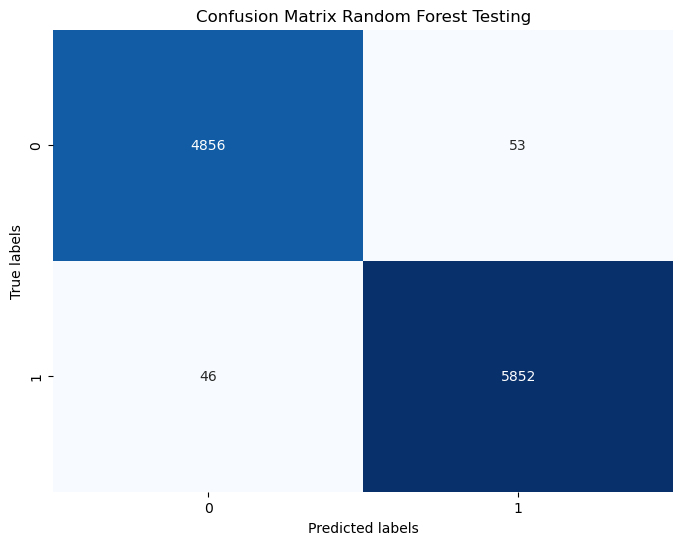

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
class_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
class_model.fit(X_train_prepared, y_train)

# Use the trained model to predict the labels of X_train
class_train = class_model.predict(X_train_prepared)
class_test = class_model.predict(X_test_prepared)

# Perform cross-validation on the training data
cv_scores = cross_val_score(class_model, X_train_prepared, y_train, cv=5)

# Evaluate the model
# compute accuracy on the training data
accuracy_train = class_model.score(X_train_prepared, y_train)
accuracy_test = class_model.score(X_test_prepared, y_test)


print("RF Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

# Generate classification report for test data
classification_report_rf = classification_report(y_test, class_test)
print("Classification Report for Test Data (Random Forest):")
print(classification_report_rf)


# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, class_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Random Forest Testing')
plt.show()

## Analyze Results

The model correctly labeled 4,856 mushrooms as safe, and would have mislabeled as safe, 46 poisonous mushrooms. Even given that 46 poisonous mushrooms slipped through, statistically our random forest regression model does a pretty good job with a 99% accuracy rate.  Still, given the significant downside of misclassifying a poisonous mushroom as safe, we may want to further reduce this particular mislabeling by prioritizing recall over precision. In this case prioritizing recall means wasting some good mushrooms (accepting more false positives) in order to recommend less poisonous mushrooms (accept less false negatives).

## Fine Tuning

If we are in a scenario where (1) mushrooms are plentiful and (2) you'd never want to eat a poisonous mushroom, then there is a relatively low penalty for throwing out some % of edible but suspicious mushrooms just to be on the safe side. With this understanding, we can fine tune our model based on our situation. Our model will be optimized for our situation then if it can recommend only safe mushrooms without disqualifying an exorbitant number of edible mushrooms. 

We will primarily look at our results through the lens of a Confusion Matrix like the one above, and when analyzing our confusion matrices we will be primarily concerned with the left side of the matrix. The upper left quadrant represents mushrooms that the model correctly labeled as edible. The lower left quadrant represents mushrooms the model has mislabeled as edible (which are actually poisonous). The sweet spot for our model then will be returning a 0 in the lower left quadrant while also returning some reasonable number in the upper left quadrant. We can mostly ignore the right side of our confusion matrix, the right side of the matrix represents mushrooms that are ostensibly poisonous.  

### Optimize Threshold for Our Purpose

For binary classification, instances classified with probabilities above our threshold are classified as positive (poisonous), and those below are classified as negative (safe). Below we arrange to prioritize recall over precision by looping though all the possible thresholds and saving the threshold where accuracy is maximized.... A threshold value (0.02 in this case) is chosen to correctly label 3,329 edible mushrooms while allowing 0 poisonous mushrooms through the filter. We've increased recall at the cost of precision but this model is robust and even after maximizing recall our precision is still .789. Adjustments can be made as needed to prioritize either recall or precision, for example a threshold value of .03 would correctly label an additional 316 edible mushrooms while allowing 2 poisonous mushrooms to pass the filter.

In [11]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# 1. Obtain predicted probabilities
probabilities = class_model.predict_proba(X_test_prepared)

# 2. Choose a threshold (e.g., 0.5)
threshold = 0.02
# 3. Adjust predictions based on the threshold
# probabilities[:, 1] = because the second column corresponds to the "poisonous" class (1 = poisonous, 0 = safe)
adjusted_predictions = (probabilities[:, 1] > threshold).astype(int)

# 4. Evaluate performance
adjusted_precision = precision_score(y_test, adjusted_predictions)
adjusted_recall = recall_score(y_test, adjusted_predictions)
adjusted_accuracy = accuracy_score(y_test, adjusted_predictions)

print("Adjusted Precision:", adjusted_precision)
print("Adjusted Recall:", adjusted_recall)
print("Adjusted Accuracy:", adjusted_accuracy)


Adjusted Precision: 0.788713559775341
Adjusted Recall: 1.0
Adjusted Accuracy: 0.8537984639585454


In [12]:
# probabilities
# adjusted_predictions

### View Adjusted Results

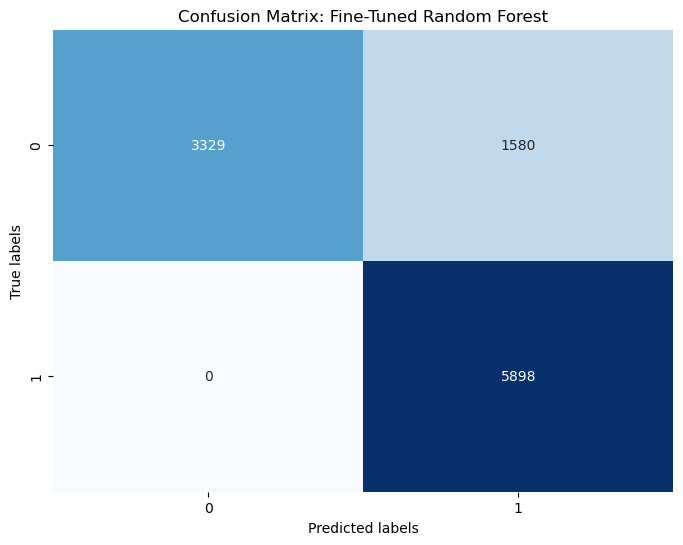

In [13]:
# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, adjusted_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Fine-Tuned Random Forest')
plt.show()

# Apply a preprocessor to predict any variable in the set based on remaining variables

# Data Preprocessing Function

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

def preprocess_train(df, target, task):
    df = df.copy()
    
    
    # to create a new series composed of our targets
    y = df[target].copy()
    # to drop our target column and resave without the target column
    X = df.drop(target, axis=1)

    # create a training and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

    # scale the data, give each column a similar round of values
    scaler = StandardScaler()
    scaler.fit(X_train)  
    
    # transform the features using the scaler
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Convert scaled arrays back to DataFrame
    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    # Create the model
    if task == 'regression':
        model = LinearRegression()
    elif task == 'classification':
        model = LogisticRegression()
    
    # fit the model
    model.fit(X_train, y_train)
    
    # Return test results
    return model.score(X_test, y_test)

In [15]:
results = preprocess_train(mush_df, 'class', 'classification')

In [16]:
print("Classification Test Results for Class: {:.2f}%".format(results * 100))

Classification Test Results for Class: 63.65%


In [17]:
results = preprocess_train(mush_df, 'cap-diameter', 'regression')

In [18]:
print("Regression Test Results for cap-diameter: {:.2f}%".format(results * 100))

Regression Test Results for cap-diameter: 69.56%


In [19]:
results = preprocess_train(mush_df, 'cap-shape', 'classification')

In [20]:
print("Classification Test Results for cap-shape: {:.2f}%".format(results * 100))

Classification Test Results for cap-shape: 46.90%


In [21]:
results = preprocess_train(mush_df, 'gill-attachment', 'classification')

In [22]:
print("Classification Test Results for gill-attachment: {:.2f}%".format(results * 100))

Classification Test Results for gill-attachment: 46.01%


In [23]:
results = preprocess_train(mush_df, 'gill-color', 'classification')

In [24]:
print("Classification Test Results for gill-color: {:.2f}%".format(results * 100))

Classification Test Results for gill-color: 35.60%


In [25]:
results = preprocess_train(mush_df, 'stem-height', 'regression')

In [26]:
print("Regression Test Results for stem-height: {:.2f}%".format(results * 100))

Regression Test Results for stem-height: 7.09%


In [27]:
results = preprocess_train(mush_df, 'stem-width', 'regression')

In [28]:
print("Regression Test Results for stem-width: {:.2f}%".format(results * 100))

Regression Test Results for stem-width: 69.83%


In [29]:
results = preprocess_train(mush_df, 'stem-color', 'classification')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print("Classification Test Results for stem-color: {:.2f}%".format(results * 100))

Classification Test Results for stem-color: 44.59%


In [31]:
results = preprocess_train(mush_df, 'season', 'regression')

In [32]:
print("Regression Test Results for season: {:.2f}%".format(results * 100))

Regression Test Results for season: 3.35%
